### Analyzing Android App Market

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob

In [4]:
# Visualization style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

In [6]:
apps = pd.read_csv("/content/apps.csv")
reviews = pd.read_csv("/content/user_reviews.csv")

In [7]:
print(apps.head())
print(reviews.head())

   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  J

In [11]:
# Remove duplicates
apps.drop_duplicates(inplace=True)

# Convert Reviews to numeric
apps["Reviews"] = pd.to_numeric(apps["Reviews"], errors="coerce")

# Clean Installs column
apps["Installs"] = apps["Installs"].astype(str) # Convert to string to allow .str accessor
apps["Installs"] = apps["Installs"].str.replace("+","", regex=False)
apps["Installs"] = apps["Installs"].str.replace(",","", regex=False)
apps["Installs"] = pd.to_numeric(apps["Installs"], errors="coerce")

# Clean Price column
apps["Price"] = apps["Price"].astype(str) # Convert to string to allow .str accessor
apps["Price"] = apps["Price"].str.replace("$","", regex=False)
apps["Price"] = pd.to_numeric(apps["Price"], errors="coerce")

# Clean Size column
apps["Size"] = apps["Size"].astype(str) # Convert to string to allow .str accessor
apps["Size"] = apps["Size"].str.replace("M","", regex=False)
apps["Size"] = apps["Size"].str.replace("k","", regex=False)
apps["Size"] = apps["Size"].replace("Varies with device", np.nan)
apps["Size"] = pd.to_numeric(apps["Size"], errors="coerce")

# Convert Rating to numeric
apps["Rating"] = pd.to_numeric(apps["Rating"], errors="coerce")

# Drop null essential values
apps = apps.dropna(subset=["Rating", "Installs"])

apps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8196 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8196 non-null   int64  
 1   App             8196 non-null   object 
 2   Category        8196 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         8196 non-null   int64  
 5   Size            7027 non-null   float64
 6   Installs        8196 non-null   int64  
 7   Type            8196 non-null   object 
 8   Price           8196 non-null   float64
 9   Content Rating  8196 non-null   object 
 10  Genres          8196 non-null   object 
 11  Last Updated    8196 non-null   object 
 12  Current Ver     8192 non-null   object 
 13  Android Ver     8194 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 960.5+ KB


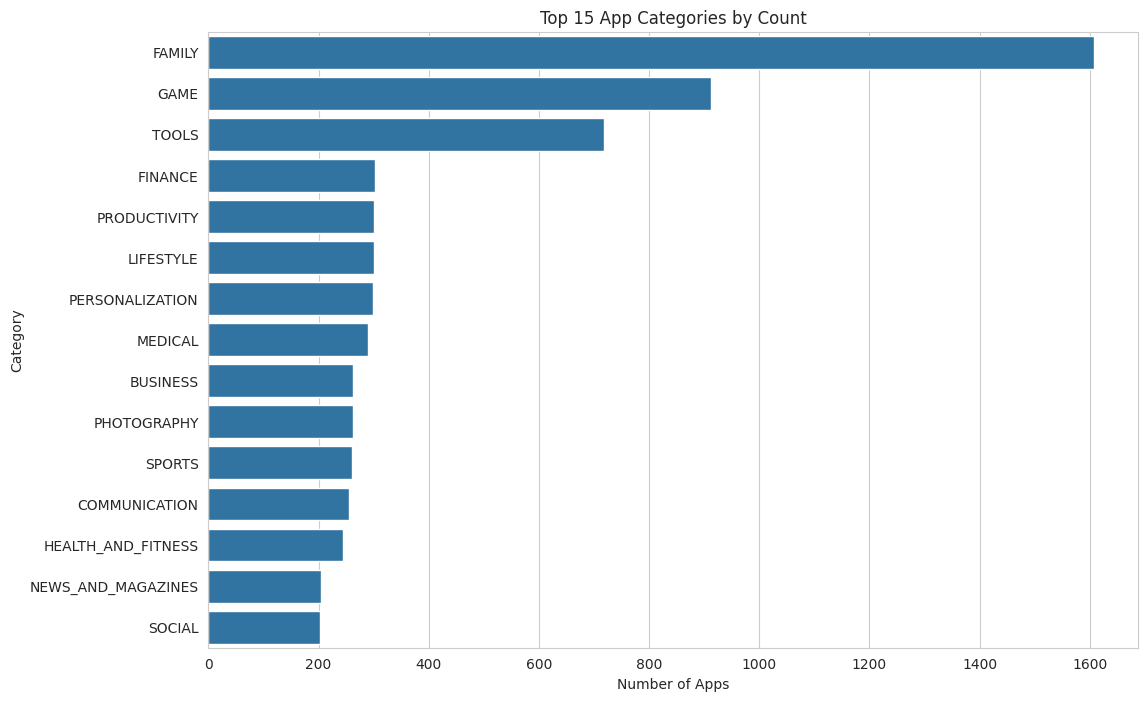

In [12]:
category_counts = apps["Category"].value_counts()

plt.figure(figsize=(12,8))
sns.barplot(y=category_counts.index[:15], x=category_counts.values[:15])
plt.title("Top 15 App Categories by Count")
plt.xlabel("Number of Apps")
plt.ylabel("Category")
plt.show()

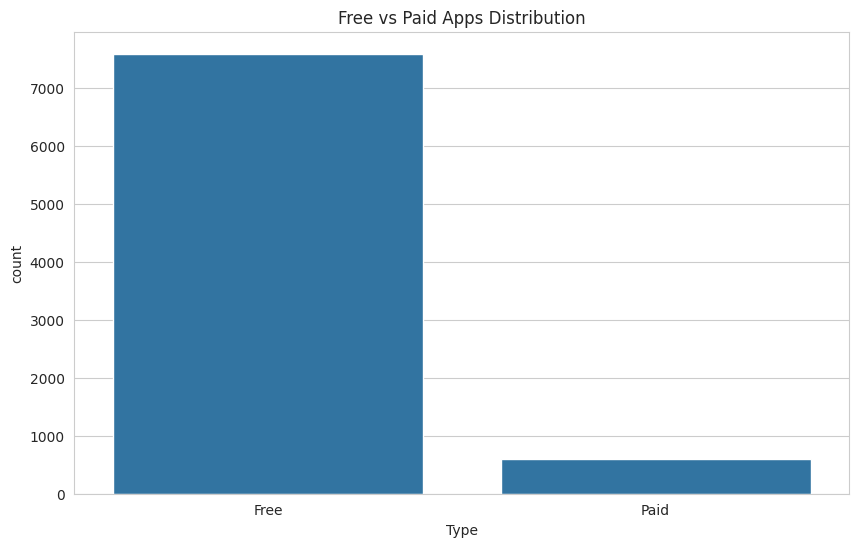

In [13]:
sns.countplot(data=apps, x="Type")
plt.title("Free vs Paid Apps Distribution")
plt.show()

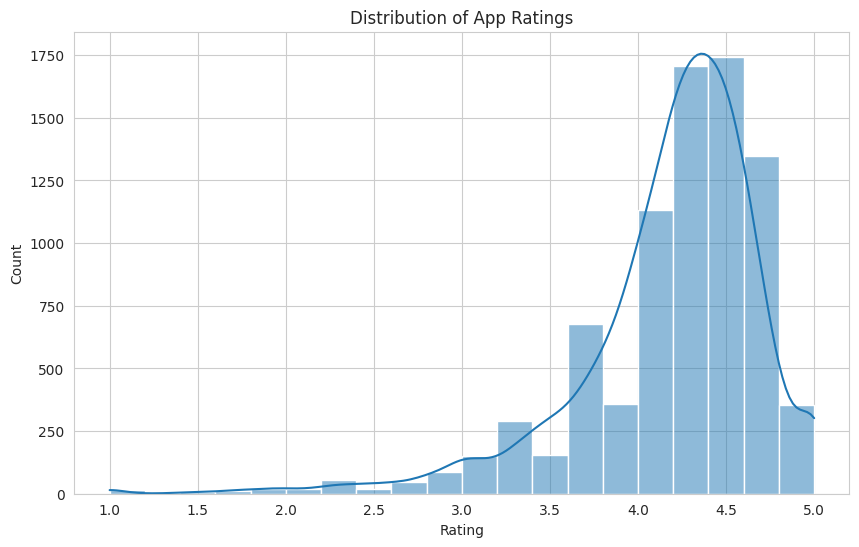

In [14]:
sns.histplot(apps["Rating"], bins=20, kde=True)
plt.title("Distribution of App Ratings")
plt.show()

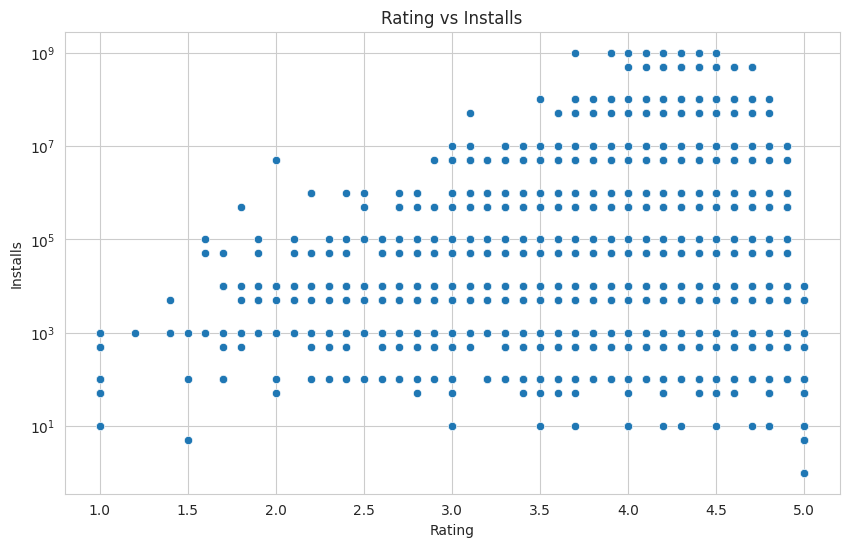

In [15]:
sns.scatterplot(data=apps, x="Rating", y="Installs")
plt.title("Rating vs Installs")
plt.yscale("log")
plt.show()

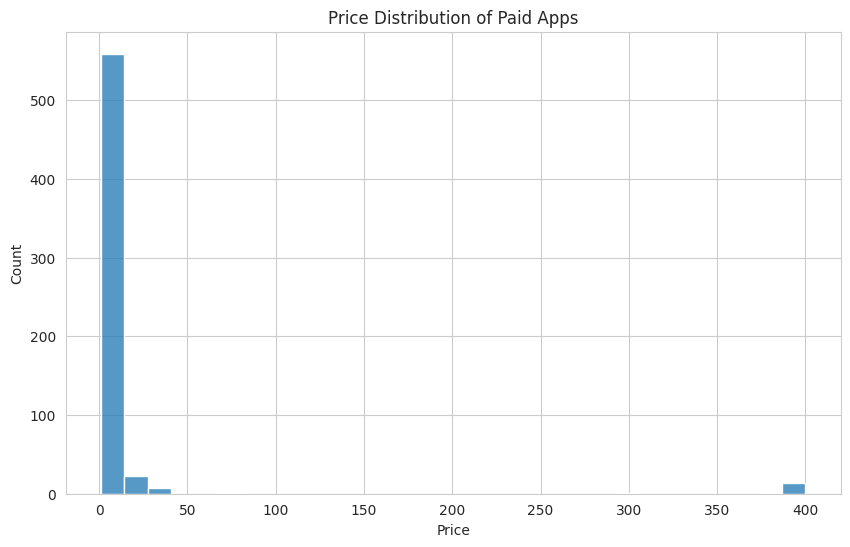

In [16]:
paid_apps = apps[apps["Type"] == "Paid"]

sns.histplot(paid_apps["Price"], bins=30)
plt.title("Price Distribution of Paid Apps")
plt.show()

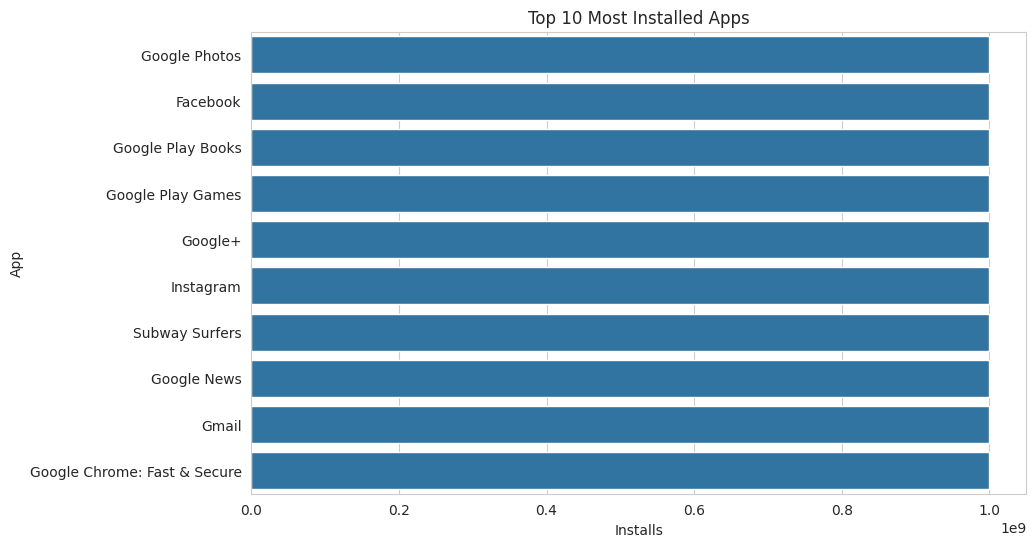

In [17]:
top_installs = apps.sort_values("Installs", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="Installs", y="App", data=top_installs)
plt.title("Top 10 Most Installed Apps")
plt.show()

In [18]:
reviews = reviews.dropna(subset=["Translated_Review"])

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

reviews["Sentiment_Score"] = reviews["Translated_Review"].apply(get_sentiment)

# Classify sentiment
def classify_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

reviews["Sentiment_Type"] = reviews["Sentiment_Score"].apply(classify_sentiment)

reviews.head()

/tmp/ipython-input-167/2675542577.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews["Sentiment_Score"] = reviews["Translated_Review"].apply(get_sentiment)
/tmp/ipython-input-167/2675542577.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews["Sentiment_Type"] = reviews["Sentiment_Score"].apply(classify_sentiment)


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment_Score,Sentiment_Type
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,1.00,Positive
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.25,Positive
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.40,Positive
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,1.00,Positive
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,1.00,Positive


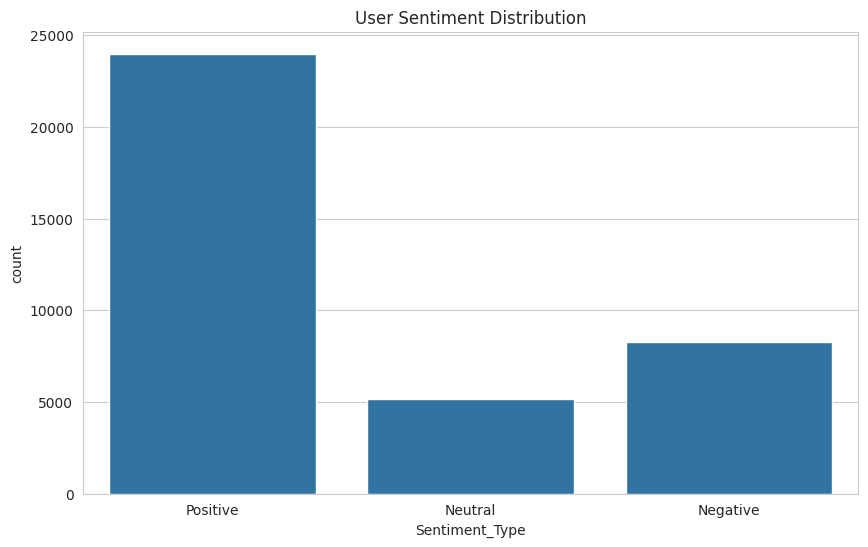

In [19]:
sns.countplot(data=reviews, x="Sentiment_Type")
plt.title("User Sentiment Distribution")
plt.show()

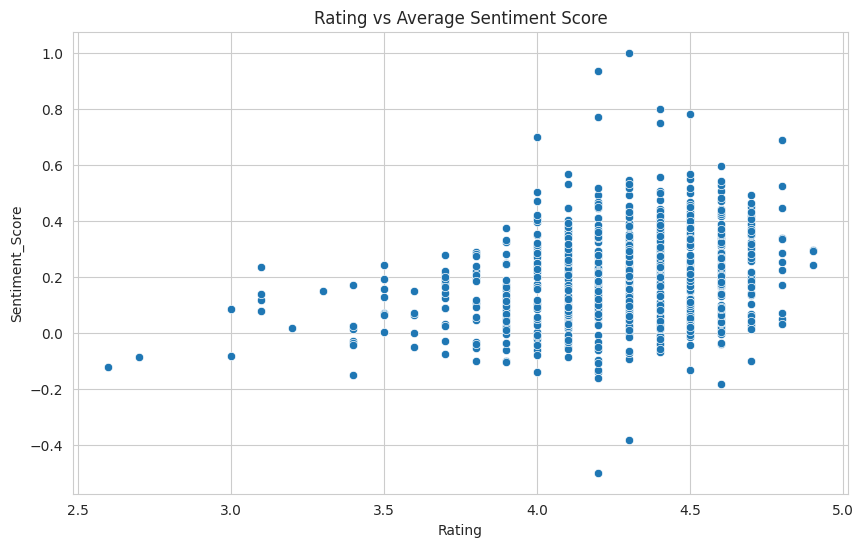

In [20]:
avg_sentiment = reviews.groupby("App")["Sentiment_Score"].mean().reset_index()

# Merge with app dataset
apps_sentiment = pd.merge(apps, avg_sentiment, on="App", how="left")

sns.scatterplot(data=apps_sentiment, x="Rating", y="Sentiment_Score")
plt.title("Rating vs Average Sentiment Score")
plt.show()

In [21]:
import plotly.express as px

fig = px.scatter(apps,
                 x="Rating",
                 y="Installs",
                 color="Category",
                 size="Reviews",
                 hover_name="App",
                 title="Interactive App Market Analysis")

fig.show()